In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("/home/yash/Downloads/titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().sum()
# missing value of each collumn 

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [5]:
(df["Age"].isnull().sum()/df["Age"].count())*100
# it show percentage of missing values in Age collumn

np.float64(24.789915966386555)

In [6]:
x = df["Fare"].isnull().mean()*100
print(x)
# it show percentage of missing values in Fare collumn

5.05050505050505


In [7]:
df.isnull().mean()*100
# it show percentage of missing values in every collumn

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [8]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = "Survived"),df["Survived"],train_size = 0.8,random_state = 0)

In [9]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 3), (179, 3), (712,), (179,))

In [10]:
x_train.isnull().mean()*100,x_test.isnull().mean()*100

(Age       19.803371
 Fare       5.477528
 Family     0.000000
 dtype: float64,
 Age       20.111732
 Fare       3.351955
 Family     0.000000
 dtype: float64)

In [11]:
mean_age = x_train["Age"].mean()
median_age = x_train["Age"].median()

mean_fare = x_train["Fare"].mean()
median_fare = x_train["Fare"].median()

In [ ]:
x_train["Age_mean"] = x_train["Age"].fillna(mean_age)
x_train["Age_median"] = x_train["Age"].fillna(median_age)

x_train["Fare_mean"] = x_train["Fare"].fillna(mean_fare)
x_train["Fare_median"] = x_train["Fare"].fillna(median_fare)

In [13]:
x_train.head(10)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
140,NaN,15.2458,2,29.745184,29.0,15.245800,15.2458
439,31.0,10.5000,0,31.000000,31.0,10.500000,10.5000
817,31.0,37.0042,2,31.000000,31.0,37.004200,37.0042
378,20.0,NaN,0,20.000000,20.0,31.885314,14.4542
491,21.0,7.2500,0,21.000000,21.0,7.250000,7.2500
331,45.5,28.5000,0,45.500000,45.5,28.500000,28.5000
588,22.0,8.0500,0,22.000000,22.0,8.050000,8.0500
358,NaN,7.8792,0,29.745184,29.0,7.879200,7.8792
674,NaN,0.0000,0,29.745184,29.0,0.000000,0.0000
162,26.0,NaN,0,26.000000,26.0,31.885314,14.4542


In [14]:
print("Original Age Variable Variance : ",x_train["Age"].var())
print("Age Variance After Mean Imputation  : ",x_train["Age_mean"].var())
print("Age Variance After Median Imputation  : ",x_train["Age_median"].var(),"\n")

print("Original Fare Variable Variance : ",x_train["Fare"].var())
print("Fare Variance After Mean Imputation  : ",x_train["Fare_mean"].var())
print("Fare Variance After Median Imputation  : ",x_train["Fare_median"].var())

Original Age Variable Variance :  213.7165085187578
Age Variance After Mean Imputation  :  171.33390978297038
Age Variance After Median Imputation  :  171.42222438960798 

Original Fare Variable Variance :  2574.3526206637193
Fare Variance After Mean Imputation  :  2433.143405184275
Fare Variance After Median Imputation  :  2448.897024777755


<Axes: ylabel='Density'>

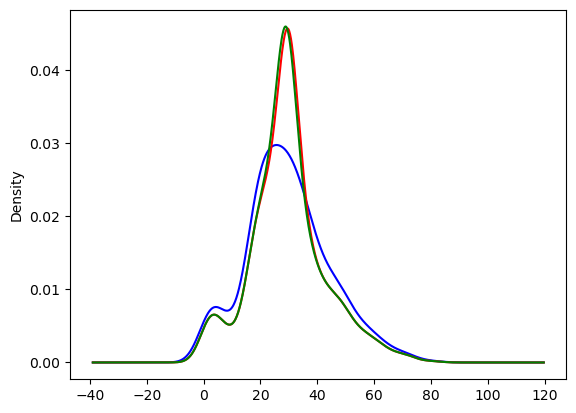

In [15]:
x_train["Age"].plot(kind = "kde",color  = "Blue")
x_train["Age_mean"].plot(kind = "kde",color  = "Red")
x_train["Age_median"].plot(kind = "kde",color  = "Green")

<Axes: ylabel='Density'>

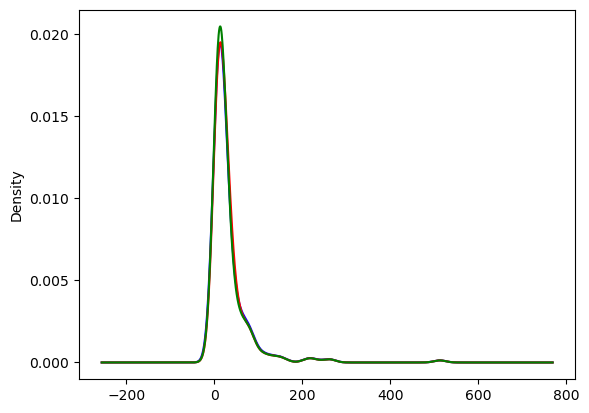

In [16]:
x_train["Fare"].plot(kind = "kde",color  = "Blue")
x_train["Fare_mean"].plot(kind = "kde",color  = "Red")
x_train["Fare_median"].plot(kind = "kde",color  = "Green")

In [17]:
x_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,213.716509,84.480223,-6.393469,213.716509,213.716509,79.571049,79.420930
Fare,84.480223,2574.352621,17.050423,67.493301,68.754981,2574.352621,2574.352621
Family,-6.393469,17.050423,2.770177,-5.125566,-5.121468,16.115167,16.285129
Age_mean,213.716509,67.493301,-5.125566,171.333910,171.333910,63.791137,63.670788
Age_median,213.716509,68.754981,-5.121468,171.333910,171.422224,64.983611,64.831778
Fare_mean,79.571049,2574.352621,16.115167,63.791137,64.983611,2433.143405,2433.143405
Fare_median,79.420930,2574.352621,16.285129,63.670788,64.831778,2433.143405,2448.897025


In [18]:
x_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.106334,-0.295318,1.000000,1.000000,0.103929,0.103346
Fare,0.106334,1.000000,0.198661,0.101058,0.102921,1.000000,1.000000
Family,-0.295318,0.198661,1.000000,-0.235270,-0.235021,0.196290,0.197721
Age_mean,1.000000,0.101058,-0.235270,1.000000,0.999742,0.098800,0.098295
Age_median,1.000000,0.102921,-0.235021,0.999742,1.000000,0.100620,0.100062
Fare_mean,0.103929,1.000000,0.196290,0.098800,0.100620,1.000000,0.996778
Fare_median,0.103346,1.000000,0.197721,0.098295,0.100062,0.996778,1.000000


<Axes: >

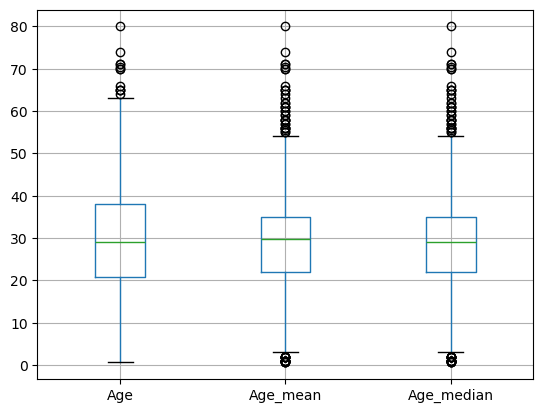

In [19]:
x_train[["Age","Age_mean","Age_median"]].boxplot()
# in Age_mean,Age_median So many outlier

<Axes: >

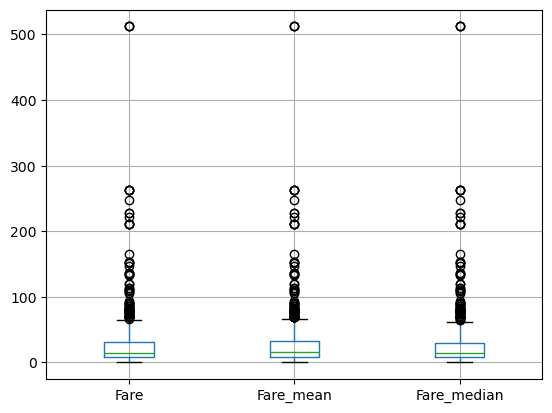

In [20]:
x_train[["Fare","Fare_mean","Fare_median"]].boxplot()
# in Fare there are no major change after imputer

### By Using Sklearn 

In [21]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = "Survived"),df["Survived"],train_size = 0.8,random_state = 0)

In [23]:
imputer1 = SimpleImputer(strategy = "median",missing_values = np.nan)
imputer2 = SimpleImputer(strategy = "mean",missing_values = np.nan)

In [24]:
trf = ColumnTransformer([
    ("imputer1",imputer1,["Age"]),
    ("imputer2",imputer2,["Fare"])
],remainder = "passthrough")
# Apply Median on Age ANd MEan on Fare 

In [25]:
trf.fit(x_train)

/home/yash/anaconda3/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [26]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)